In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
t1 = tf.Variable([1, 2, 3], dtype=tf.float32)
t2 = tf.Variable([10, 20, 30], dtype=tf.float32)

In [28]:
with tf.GradientTape() as tape:
    t3 = t1 * t2
    t4 = t3 + t2

In [29]:
print(t1.numpy())
print(t2.numpy())
print(t3.numpy())

[1. 2. 3.]
[10. 20. 30.]
[10. 40. 90.]


back propagation에 사용될 값을 저장하는 tape이라고 생각하면 됨

즉, t3의 연산 결과는 t1의 편미분값 t2를 구하게 되고

t2에 대해서는 t1을 구하게 됨

In [27]:
gradients = tape.gradient(t3, [t1, t2])
print(gradients)

print('dt1 :', gradients[0])
print('dt2 :', gradients[1])

[<tf.Tensor: shape=(3,), dtype=float32, numpy=array([10., 20., 30.], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>]
dt1 : tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
dt2 : tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


In [30]:
gradients = tape.gradient(t4, [t1, t2, t3])

print('dt1 :', gradients[0])
print('dt2 :', gradients[1])
print('dt3 :', gradients[2])

dt1 : tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
dt2 : tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)
dt3 : tf.Tensor([1. 1. 1.], shape=(3,), dtype=float32)


---

- 선형회귀 레이어 구현

    - GradientTape을 통해 역전파에 사용하는 편미분값을 알 수 있다면, 직접 선형회귀식을 구현할 수 있음

    - w : weight, b : bias

    - 가중치에 x를 곱하고, 편향값을 더한다면 회귀식이 됨 ==> $wx+b$
    
    - 예측 결과에 타겟(y)의 실제값을 뺀 제곱은 손실함수가 됨 ==> $((wx+b)-y)^2$

    - 손실함수를 얻기 위해 사용된 w와 b의 편미분값을 원래의 w, b에서 빼면
      역전파 단계에서 전달하는 w, b가 됨

    - learning rate가 필요하다면 원래 w, b에서 각 학습율의 차분을 편미분값에 곱함 
    
    - GradientTape을 통해 얻어진 편미분값을 사용해 새로운 w, b값을 얻은 다음, 학습 과정을 반복하면 (회귀식에 대입) 신경망을 반복하는 모델이 완성됨


In [44]:
x_data = tf.random.normal(shape=(1000,), dtype=tf.float32)
y_data = 3*x_data + 1


w = tf.Variable(-1, dtype=tf.float32)
b = tf.Variable(-1, dtype=tf.float32)

learning_rate = 0.01
w_trace, b_trace = [], []
EPOCHS = 10

for epoch in range(EPOCHS):
    for x, y in zip(x_data, y_data):
        with tf.GradientTape() as tape:
            prediction = w * x + b
            loss = ( prediction - y )**2

        gradients = tape.gradient(loss, [w, b])

        w_trace.append(w.numpy())
        b_trace.append(b.numpy())

        w = tf.Variable(w - learning_rate * gradients[0])
        b = tf.Variable(b - learning_rate * gradients[1])

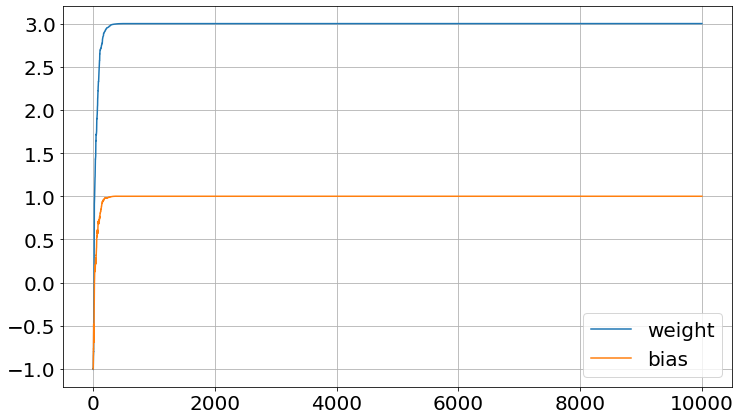

In [45]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(w_trace, label='weight')
ax.plot(b_trace, label='bias')

ax.tick_params(labelsize=20)
ax.legend(fontsize=20)
ax.grid()

plt.show()